# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Traffic Sign Recognition Classifier

Deep learning example of classifying german traffic signs

---
## Step 0: Load Data

In [28]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
import csv
import os
import zipfile

from mpl_toolkits.axes_grid1 import ImageGrid
from collections import Counter
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
from sklearn import preprocessing


train_zip = zipfile.ZipFile('data/train.p.zip', 'r')
valid_zip = zipfile.ZipFile('data/valid.p.zip', 'r')
test_zip = zipfile.ZipFile('data/test.p.zip', 'r')

train_zip.extractall('data/')
train_zip.close()

valid_zip.extractall('data/')
valid_zip.close()

test_zip.extractall('data/')
test_zip.close()

training_file = 'data/train.p'
validation_file = 'data/valid.p'
testing_file = 'data/test.p'
examples_file = 'data/examples.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(examples_file, mode='rb') as f:
    examples = pickle.load(f)
with open('data/signnames.csv', 'rt') as csvfile:
    class_labels = []
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        class_labels.append(row['SignName'])
        
os.remove('data/train.p')
os.remove('data/valid.p')
os.remove('data/test.p')
        
#Load and shuffle the training, validation, and test data
X_train, Y_train = train['features'], train['labels']
X_valid, Y_valid = valid['features'], valid['labels']
X_test, Y_test = test['features'], test['labels']

#Extract features and labels for 5 examples signs
X_examples, Y_examples = examples['features'], examples['labels']

assert(len(X_train) == len(Y_train))
assert(len(X_valid) == len(Y_valid))
assert(len(X_test) == len(Y_test))
assert(len(X_examples) == len(Y_examples))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_valid = len(X_valid)

# Number of testing examples
n_test = len(X_test)

# Shape of a traffic sign image
image_shape = X_train[0].shape

# Unique classes/labels in the dataset
n_classes = len(np.unique(np.concatenate((Y_train,Y_valid,Y_test))))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

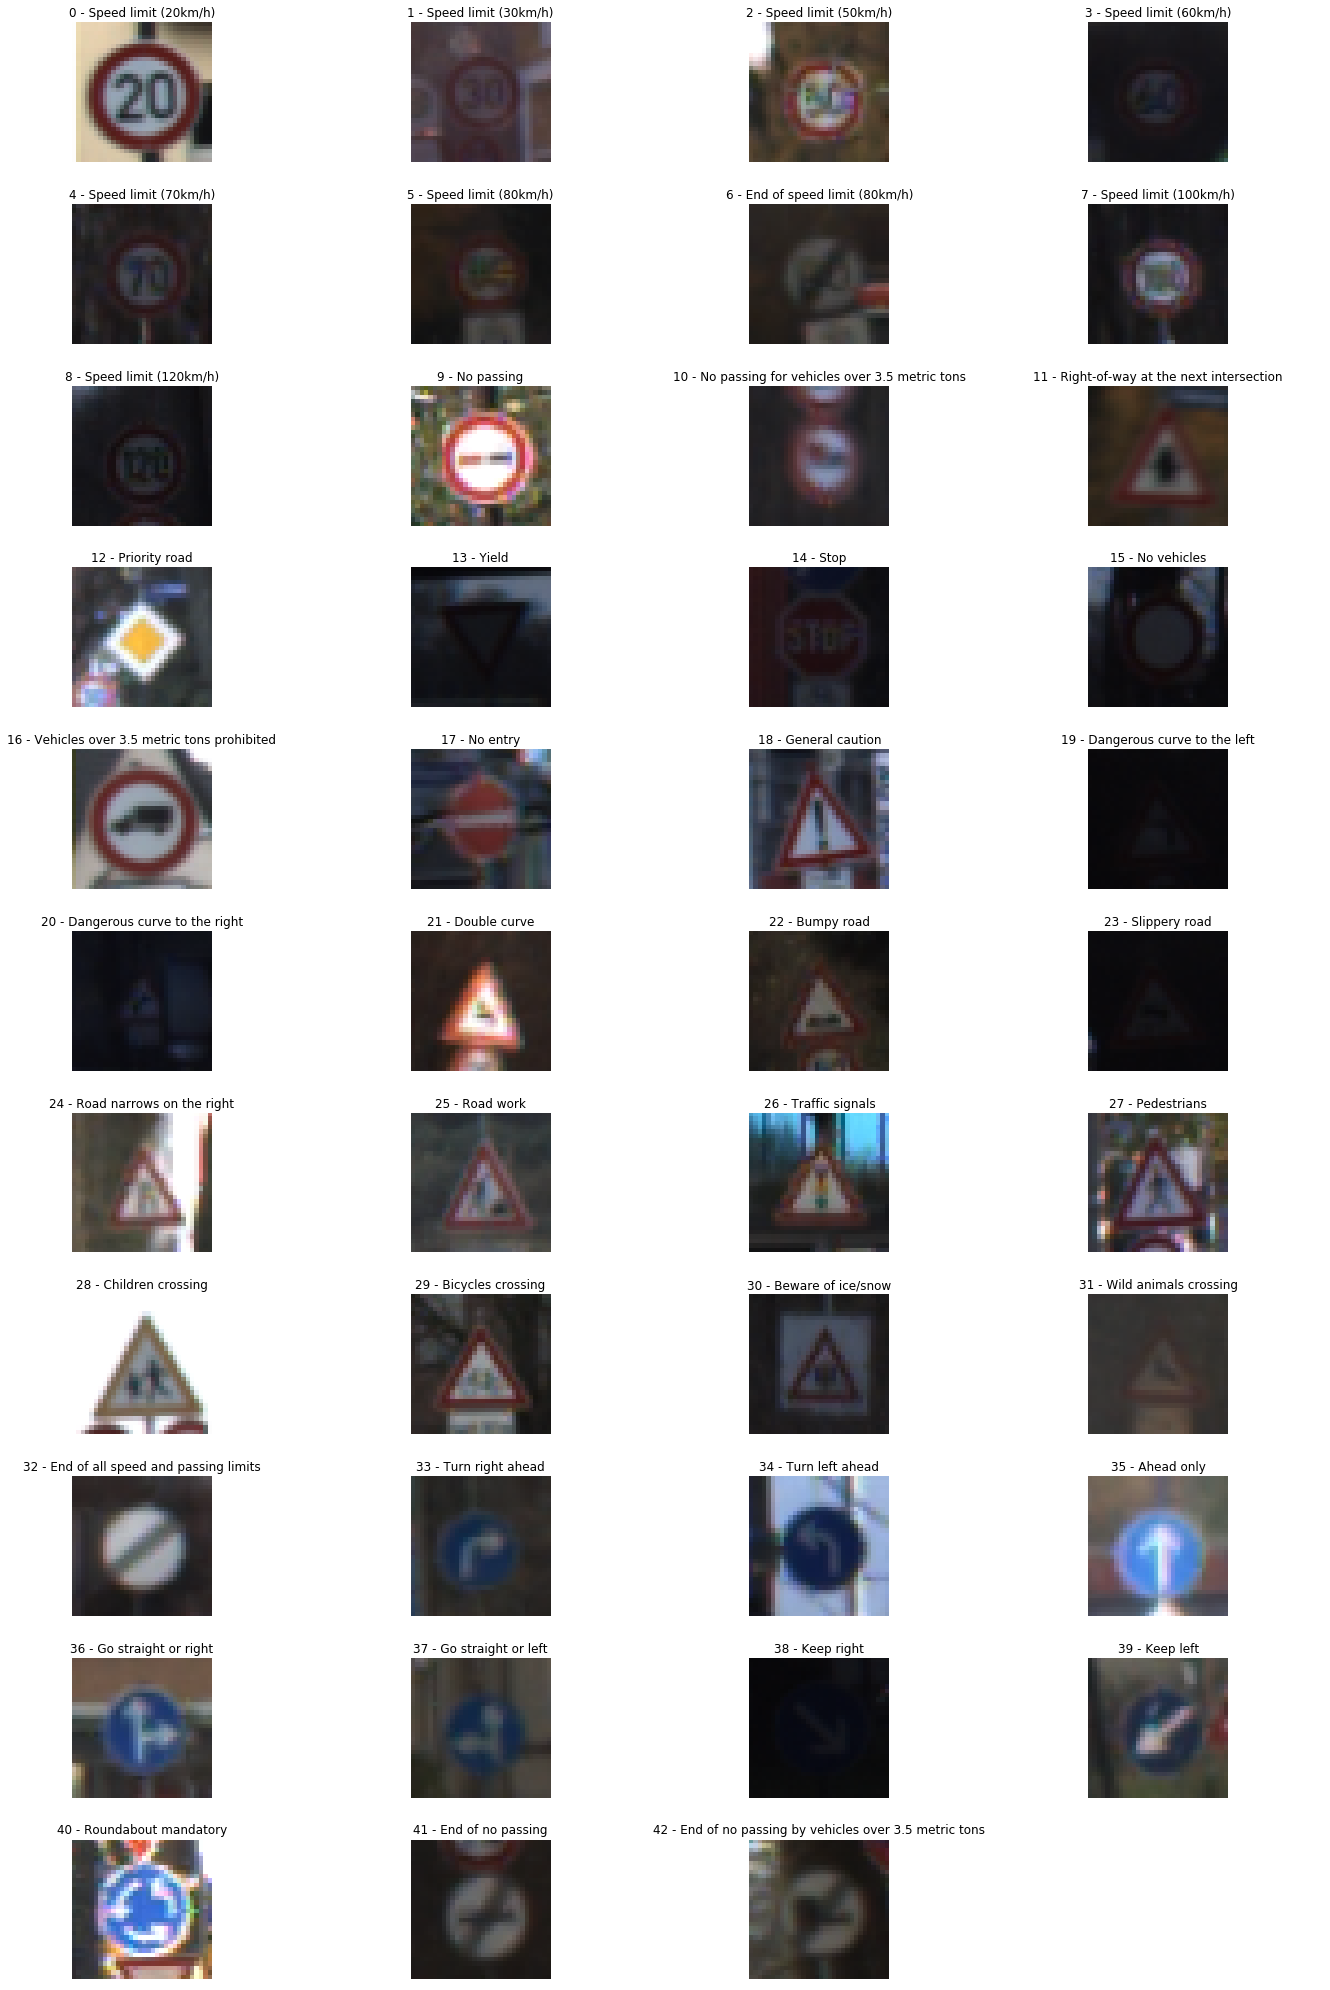

In [3]:
%matplotlib inline

#Instatiated a figure to display classification ids with their associated image
fig, axes = plt.subplots(11, 4, figsize=(24, 36), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.3, wspace=0.05)

#Turn off frame for each cell
np.vectorize(lambda axes:axes.axis('off'))(axes)

#Loop through all class labels and display the image classification
for x in range(0, n_classes):
    first_example_index = next(idx for idx, obj in enumerate(Y_train) if obj==x)
    axes.flat[x].imshow(X_train[first_example_index])
    axes.flat[x].set_title(str(x) + " - " + class_labels[x])

### 5 images downloaded from the web

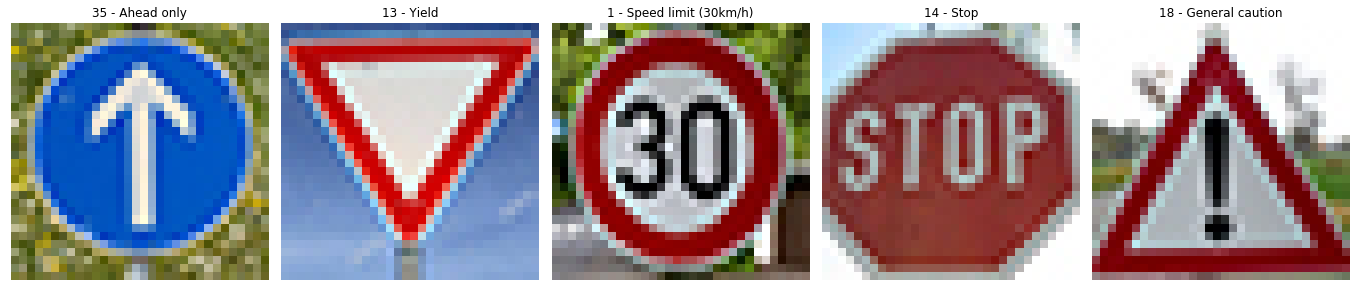

In [4]:
#Instatiated a figure to display classification ids with their associated image
fig, axes = plt.subplots(1, 5, figsize=(24, 24), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.3, wspace=0.05)

#Turn off frame for each cell
np.vectorize(lambda axes:axes.axis('off'))(axes)
    
#Loop through all class labels and display the image classification
for i in range(0, 5):
    axes.flat[i].imshow(X_examples[i])
    axes.flat[i].set_title(str(Y_examples[i]) + " - " + class_labels[Y_examples[i]])

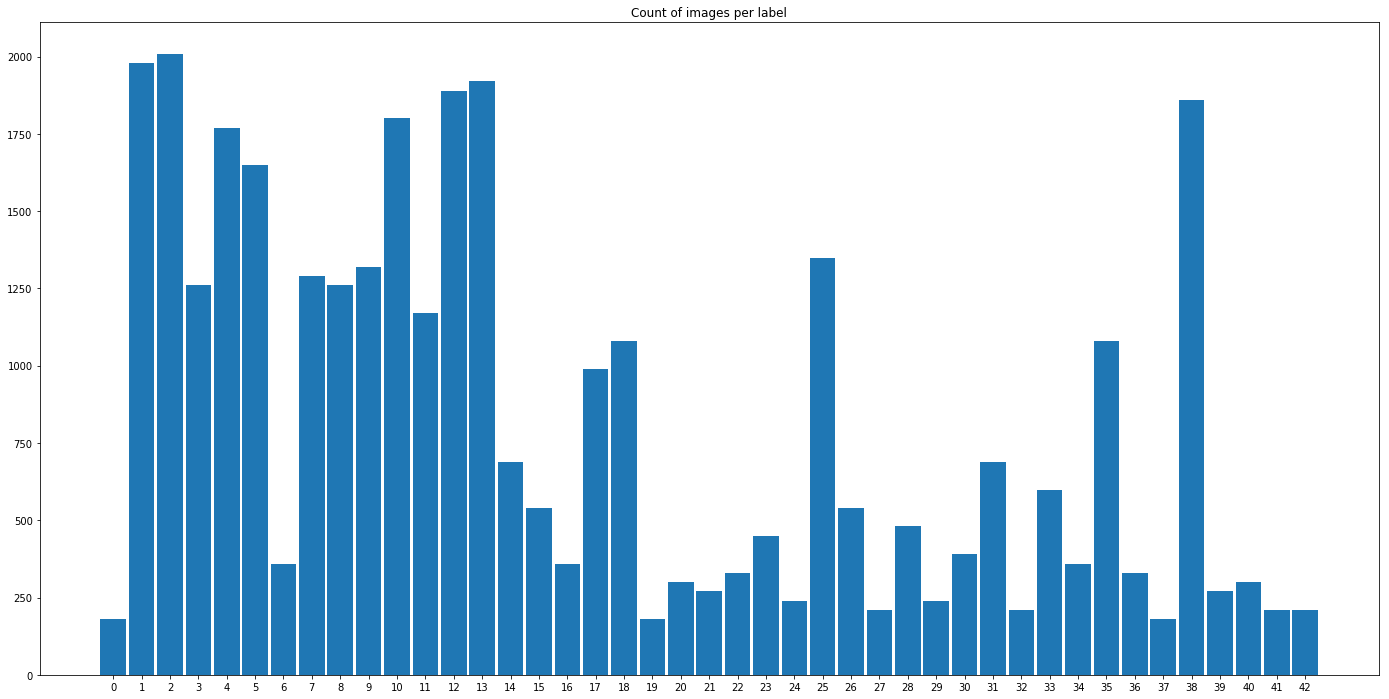

Max count of intial label training data =  2010
Label with max of intial label training data =  2
Mean of intial label training data =  809.279069767
Standard deviation of intial label training data =  619.420183705


In [5]:
Y_train_labels, Y_train_labels_values = zip(*Counter(Y_train).items())
maximum_labels_value = np.amax(Y_train_labels_values)
label_maximum_labels_value = np.argmax(Y_train_labels_values)
mean_count_of_labels = np.mean(Y_train_labels_values)
std = np.std(Y_train_labels_values)

plt.figure(figsize=(24, 12))
plt.bar(Y_train_labels, Y_train_labels_values, .9, align='center')
plt.xticks(Y_train_labels, Y_train_labels)
plt.title("Count of images per label")
plt.show(maximum_labels_value)

print("Max count of intial label training data = ", maximum_labels_value)
print("Label with max of intial label training data = ", label_maximum_labels_value)
print("Mean of intial label training data = ", mean_count_of_labels)
print("Standard deviation of intial label training data = ", std)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

In [7]:
### Useful functions for manipulating an image

def transformImageRandomly(image):
    rand_int = np.random.randint(0,1)
    if rand_int == 0:
        return rotateImageRandomly(image)
    if rand_int == 1:
        return resizeImage(image)

def resizeImage(image):
    rand_float = np.random.uniform(low=0.8, high=1.2, size=1)
    return cv2.resize(image, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)
    
def rotateImageRandomly(image):
    rand_float = np.random.uniform(low=0.8, high=1.2, size=1)
    rows,cols,color = image.shape
    center = (cols/2,rows/2)
    angle = np.random.randint(-10,10)
    scale = rand_float
    M = cv2.getRotationMatrix2D(center,angle,scale)
    transformed_image = cv2.warpAffine(image,M,(cols,rows))
    return transformed_image

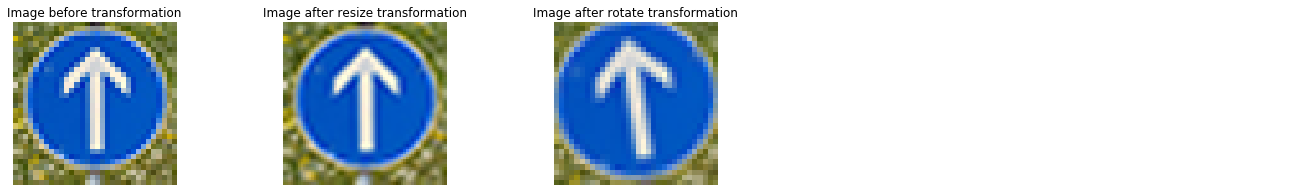

In [8]:
#Instatiated a figure to display classification ids with their associated image
fig, axes = plt.subplots(1, 5, figsize=(24, 3), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.3, wspace=0.05)

#Turn off frame for each cell
np.vectorize(lambda axes:axes.axis('off'))(axes)
    
axes.flat[0].imshow(X_examples[0])
axes.flat[0].set_title("Image before transformation")

axes.flat[1].imshow(resizeImage(X_examples[0]))
axes.flat[1].set_title("Image after resize transformation")

axes.flat[2].imshow(rotateImageRandomly(X_examples[0]))
axes.flat[2].set_title("Image after rotate transformation")

In [29]:
def normalizeImageArray(image_array):
    print("Mean before normalization =",np.mean(image_array))
    image_array = (image_array - image_array.mean())/(np.max(image_array) - np.min(image_array))
    print("Mean after normalization = ",np.mean(image_array))
    return image_array

X_train = normalizeImageArray(X_train)
X_valid = normalizeImageArray(X_valid)
X_test = normalizeImageArray(X_test)
X_examples = normalizeImageArray(X_examples)

Mean before normalization = 82.677589037
Mean after normalization =  -2.22061620326e-17
Mean before normalization = 83.5564273756
Mean after normalization =  8.97912801473e-19
Mean before normalization = 82.1484603612
Mean after normalization =  1.89959774839e-17
Mean before normalization = 128.138997396
Mean after normalization =  -3.1456319031e-17


In [10]:
from IPython.display import clear_output

for label, count in zip(Y_train_labels, Y_train_labels_values):
    for i in range(10):
        clear_output()
    print("Currently on label:",label)
    diff = maximum_labels_value - count
    if diff > 0:
        new_images = []
        new_image_labels = []
        for i in range(0, diff):
            if i < 2100:
                index = random.choice([idx for idx, obj in enumerate(Y_train) if obj == label])
                random_image = X_train[index]
                random_image = transformImageRandomly(random_image)
                random_image_label = Y_train[index]
                new_images.append(random_image)
                new_image_labels.append(random_image_label)
        X_train = np.concatenate((X_train,new_images),axis=0)
        Y_train = np.append(Y_train,new_image_labels)
    del new_images[:]
    del new_image_labels[:]

Currently on label: 42


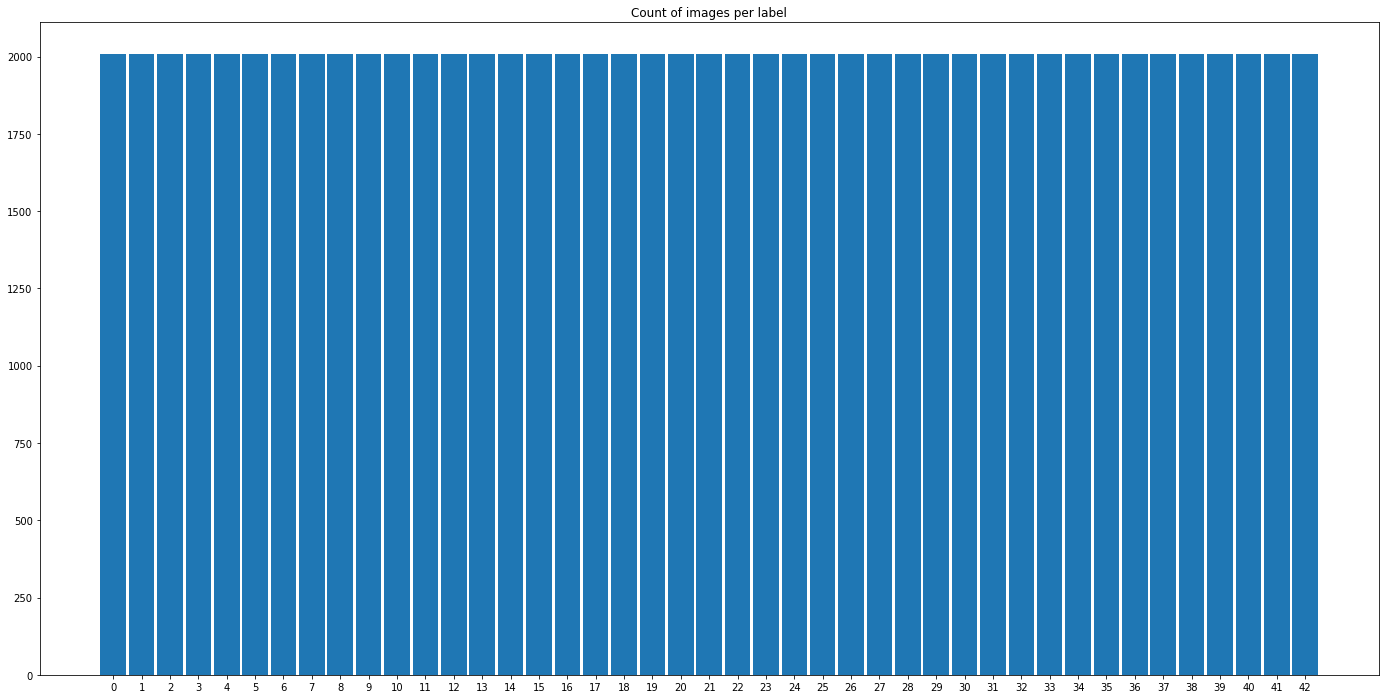

Max count of intial label training data =  2010
Label with max of intial label training data =  0
Mean of intial label training data =  2010.0
Standard deviation of intial label training data =  0.0


In [11]:
Y_train_labels, Y_train_labels_values = zip(*Counter(Y_train).items())
maximum_labels_value = np.amax(Y_train_labels_values)
label_maximum_labels_value = np.argmax(Y_train_labels_values)
mean_count_of_labels = np.mean(Y_train_labels_values)
std = np.std(Y_train_labels_values)

plt.figure(figsize=(24, 12))
plt.bar(Y_train_labels, Y_train_labels_values, .9, align='center')
plt.xticks(Y_train_labels, Y_train_labels)
plt.title("Count of images per label")
plt.show(maximum_labels_value)

print("Max count of intial label training data = ", maximum_labels_value)
print("Label with max of intial label training data = ", label_maximum_labels_value)
print("Mean of intial label training data = ", mean_count_of_labels)
print("Standard deviation of intial label training data = ", std)

In [12]:
EPOCHS = 20
BATCH_SIZE = 128


### Model Architecture

In [13]:

def TrafficSigns(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2, keep_prob)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [14]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.001
logits = TrafficSigns(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, Y_train = shuffle(X_train, Y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], Y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, Y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './model/traffic_signs')
    print("Model saved")
    


Training...

EPOCH 1 ...
Validation Accuracy = 0.727

EPOCH 2 ...
Validation Accuracy = 0.849

EPOCH 3 ...
Validation Accuracy = 0.876

EPOCH 4 ...
Validation Accuracy = 0.903

EPOCH 5 ...
Validation Accuracy = 0.906

EPOCH 6 ...
Validation Accuracy = 0.912

EPOCH 7 ...
Validation Accuracy = 0.916

EPOCH 8 ...
Validation Accuracy = 0.922

EPOCH 9 ...
Validation Accuracy = 0.932

EPOCH 10 ...
Validation Accuracy = 0.938

EPOCH 11 ...
Validation Accuracy = 0.939

EPOCH 12 ...
Validation Accuracy = 0.944

EPOCH 13 ...
Validation Accuracy = 0.952

EPOCH 14 ...
Validation Accuracy = 0.943

EPOCH 15 ...
Validation Accuracy = 0.951

EPOCH 16 ...
Validation Accuracy = 0.951

EPOCH 17 ...
Validation Accuracy = 0.953

EPOCH 18 ...
Validation Accuracy = 0.948

EPOCH 19 ...
Validation Accuracy = 0.949

EPOCH 20 ...
Validation Accuracy = 0.952

Model saved


---

## Step 3: Test a Model on New Images

I've tested the model on the test data set as well as 5 images from the internet.

In [30]:
with tf.Session() as sess:
    saver.restore(sess, './model/traffic_signs')
    output = evaluate(X_test, Y_test)
    print(output*100,"% Accurancy")

93.1195566254 % Accurancy


### Predict the Sign Type for Each Image

In [31]:
with tf.Session() as sess:
    saver.restore(sess, './model/traffic_signs')
    output = sess.run(tf.argmax(logits, 1), feed_dict={x: X_examples, keep_prob: 1.0})

for j in range(0,len(X_examples)):
    print("Predicted sign label:",output[j]," Actual label:", Y_examples[j])

Predicted sign label: 35  Actual label: 35
Predicted sign label: 13  Actual label: 13
Predicted sign label: 1  Actual label: 1
Predicted sign label: 14  Actual label: 14
Predicted sign label: 18  Actual label: 18


### Analyze Performance

In [32]:
with tf.Session() as sess:
    saver.restore(sess, './model/traffic_signs')
    output = evaluate(X_examples, Y_examples)
    print(output*100,"% Accurancy")

100.0 % Accurancy


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [34]:
for t in range(0,len(X_examples)):
    with tf.Session() as sess:
        saver.restore(sess, './model/traffic_signs')
        predicts = sess.run(tf.nn.softmax(logits), feed_dict={x: [X_examples[t]], keep_prob: 1.0})
        top_3_predicts = tf.nn.top_k(predicts, k=5)
        results = sess.run(top_3_predicts)
    print("Sign number: ",t, "Probablities:",results)

Sign number:  0 Probablities: TopKV2(values=array([[  1.00000000e+00,   1.81024584e-10,   3.65205539e-11,
          1.47012784e-11,   1.68366796e-12]], dtype=float32), indices=array([[35, 33, 36, 34, 13]], dtype=int32))
Sign number:  1 Probablities: TopKV2(values=array([[  1.00000000e+00,   1.62169999e-22,   1.22596804e-24,
          3.06928127e-25,   3.64015406e-31]], dtype=float32), indices=array([[13, 12, 15, 14,  0]], dtype=int32))
Sign number:  2 Probablities: TopKV2(values=array([[  9.99417543e-01,   5.29196986e-04,   5.29962126e-05,
          1.81097221e-07,   9.04440878e-09]], dtype=float32), indices=array([[1, 2, 0, 5, 4]], dtype=int32))
Sign number:  3 Probablities: TopKV2(values=array([[  9.97212946e-01,   1.35673583e-03,   8.56555765e-04,
          1.97860951e-04,   1.66975296e-04]], dtype=float32), indices=array([[14, 29, 17, 13,  1]], dtype=int32))
Sign number:  4 Probablities: TopKV2(values=array([[  9.99997497e-01,   2.45320734e-06,   6.04445605e-09,
          1.4089219